In [48]:
#import pandas as pd
import os
import json
import re
import string

import operator
#from pprint import pprint
#from sklearn.feature_extraction.text import CountVectorizer

data = []
all_tweet = ''
frequency = {}
#file = os.path.join("Archiveteam","archiveteam-json-twitterstream-2011","twitter-stream-2011-09-27","27","19","48.json")

path = os.path.join("Extra_Storage", "Archiveteam", "archiveteam-twitter-stream-2016-04", "2016", "04")
for dirPath, dirNames, fileNames in os.walk(path):
    for file in fileNames:
        if file.endswith("json"):
            all_tweet = ''
            data = []
            filepath = os.path.join(dirPath, file)
            with open(filepath) as json_data:
                for line in json_data:
                    data.append(json.loads(line))
                for tweet in data:
                    if 'text' in tweet:
                        tweet_lower = tweet['text'].lower()
                        all_tweet = all_tweet + tweet_lower
                    #print(all_tweet)
                match_pattern = re.findall(r'\b[a-z]{3,15}\b', all_tweet)
                for word in match_pattern:
                    count = frequency.get(word,0)
                    frequency[word] = count + 1
    
sorted_frequency = sorted(frequency.items(), key=lambda frequency: frequency[1], reverse=True)
i = 0
for words in sorted_frequency:
    if i < 200:
        print(words)
        i+=1
    else:
        break
    #pprint(data)
#df = pd.read_json(path, lines=True)

#df['text'] = df['text'].apply(lambda x: ' '.join(x))
#print(df)

KeyboardInterrupt: 

In [ ]:
i=0
for words in sorted_frequency:
    if i < 300:
        print(words)
        i+=1
    else:
        break

In [63]:
#Word count for tweets contain stock symbols
#Now check tweets contain sentiment keywords
import sys
import os
import json
import string
import pprint
import csv
import re

company_list = []
all_tweet = ''
frequency = {}
results = [] #For next part.
with open('SP500.csv') as SP500csv:
    reader = csv.DictReader(SP500csv)
    for row in reader:
        company_list.append(' $' + row['Symbol'] + ' ')
        
buy_keywords = []
sell_keywords = []
with open('keyword.csv') as keyword:
    reader = csv.DictReader(keyword)
    for row in reader:
        buy_keywords.append(row['Buy'])
        if row['Sell']:
            sell_keywords.append(row['Sell'])

path = os.path.join("Extra_Storage", "Archiveteam_Filtered")
for dirPath, dirNames, fileNames in os.walk(path):
    for file in fileNames:
        if file.endswith("json"):    
                filepath = os.path.join(dirPath, file)
                with open(filepath) as json_data:
                    data=[]
                    all_tweet = ''
                    for line in json_data:
                        data.append(json.loads(line))
                    for tweet in data:
                        if 'text' in tweet:
                            tweet_lower = tweet['text'].lower()
                            #if "$has" in tweet_lower:
                                #print(tweet['text'])
                            for company in company_list:
                                if company in tweet_lower:
                                    sentiment = False  
                                    for buy_keyword in buy_keywords:
                                            if buy_keyword in tweet_lower:
                                                sentiment = True
                                                break
                                    for sell_keyword in sell_keywords:            
                                            if sell_keyword in tweet_lower:
                                                sentiment = True
                                                break
                                    if sentiment:
                                        all_tweet = all_tweet + tweet_lower
                                        results.append(tweet)
                                        break
                                    
                    match_pattern = re.findall(r'\b[a-z]{3,15}\b', all_tweet)
                    for word in match_pattern:
                        count = frequency.get(word,0)
                        frequency[word] = count + 1
                        
sorted_frequency_stock = sorted(frequency.items(), key=lambda frequency: frequency[1], reverse=True)
i = 0
for words in sorted_frequency_stock:
    if i < 500:
        print(words)
        i+=1
    else:
        break                    

In [64]:
i=0
for words in sorted_frequency_stock:
    if i < 5000:
        print(words)
        i+=1
    else:
        break          

In [47]:
i = 0
new_company_list = []
with open('SP500.csv') as SP500csv:
    reader = csv.DictReader(SP500csv)
    for row in reader:
        new_company_list.append(row['Symbol'].lower())        
new_company_list.append('etf')
new_company_list.append('spy')
new_company_list.append('qqq')
new_company_list.append('gld')
new_company_list.append('slv')
new_company_list.append('spx')
new_company_list.append('vix')
new_company_list.append('twtr')
new_company_list.append('dia')
new_company_list.append('tsla')
new_company_list.append('via')
new_company_list.append('iwm')
new_company_list.append('nasdaq')
new_company_list.append('nyse')


sorted_frequency_stock_list = {}
print('Neutral Words:')
for words in sorted_frequency_stock:
    if i < 300:
        if words[0] in new_company_list:
            sorted_frequency_stock_list.update({words})
        else:
            sentiment = 0
            for buy_keyword in buy_keywords:
                if buy_keyword in words[0]:
                    sentiment = 1
            for sell_keyword in sell_keywords:
                if sell_keyword in words[0]:
                    sentiment = 1
            if sentiment == 0:
                print(words)
        i+=1
    else:
        break           
        
print("\nStock/ETF names:")
#print(sorted_frequency_stock_list)
for word in sorted_frequency_stock_list:
    print(word, ':', sorted_frequency_stock_list[word])

Neutral Words:
('https', 9151)
('inc', 1697)
('the', 1580)
('stock', 1067)
('for', 982)
('shares', 938)
('and', 802)
('with', 569)
('stocks', 519)
('rating', 477)
('price', 433)
('from', 409)
('company', 398)
('corp', 396)
('this', 377)
('trading', 376)
('market', 353)
('management', 330)
('uso', 316)
('target', 313)
('investment', 312)
('earnings', 298)
('stake', 294)
('philstockworld', 293)
('position', 292)
('you', 273)
('are', 262)
('today', 260)
('capital', 250)
('last', 248)
('oil', 247)
('big', 246)
('more', 225)
('now', 221)
('will', 220)
('time', 216)
('here', 210)
('not', 206)
('after', 205)
('news', 202)
('february', 201)
('that', 199)
('research', 196)
('off', 189)
('january', 188)
('hold', 184)
('new', 183)
('futures', 183)
('but', 181)
('was', 178)
('bank', 178)
('apple', 177)
('monday', 172)
('day', 171)
('tuesday', 170)
('llc', 167)
('our', 161)
('term', 158)
('out', 157)
('trade', 157)
('financial', 157)
('sales', 154)
('charts', 151)
('chart', 150)
('reiterated', 146)

In [37]:
%matplotlib inline
import text_utils as tu

company_words = ''
with open('SP500.csv') as SP500csv:
    reader = csv.DictReader(SP500csv)
    for row in reader:
        company_words = company_words + ' $' + row['Symbol'].lower()
    words_to_remove = company_words + " @philstockworld 2016 $twtr $spx $dia $tsla $uso will today about with some your just have from it's /via &amp; that they your there this here"
remove = set(words_to_remove.split())

lines = tu.lines_cleanup([tweet['text'] for tweet in results], remove=remove)
words = '\n'.join(lines).split()
wf = tu.word_freq(words)
sorted_wf = sorted(wf.items(), key=lambda wf: wf[1])
tu.summarize_freq_hist(sorted_wf)
print(sorted_wf)

Number of unique words: 24864

10 least frequent words:
                  15.6% -> 1
https://t.co/zilzenceo0 -> 1
               04:10:52 -> 1
https://t.co/l53uwqw63k -> 1
                  $ilst -> 1
                   $per -> 1
                  $fndm -> 1
https://t.co/rg1cpui2by -> 1
                  "rate -> 1
         expectations." -> 1

10 most frequent words:
   corp -> 386
  price -> 434
  sells -> 455
   down -> 468
 rating -> 478
  group -> 495
  short -> 530
updated -> 697
  stock -> 906
 shares -> 938
[('15.6%', 1), ('https://t.co/zilzenceo0', 1), ('04:10:52', 1), ('https://t.co/l53uwqw63k', 1), ('$ilst', 1), ('$per', 1), ('$fndm', 1), ('https://t.co/rg1cpui2by', 1), ('"rate', 1), ('expectations."', 1), ('https://t.co/5dtb0nxn9z', 1), ('https://t.co/sr6ujc0xgn', 1), ('@hudsonbluellc', 1), ('eyesight/vision', 1), ('kidneys/liver', 1), ('ecoli', 1), ('#dividendstocks', 1), ('#income', 1), ('#longtermtrading', 1), ('#profits', 1), ('#bluechips', 1), ('https://t.co/whi9bcvhho

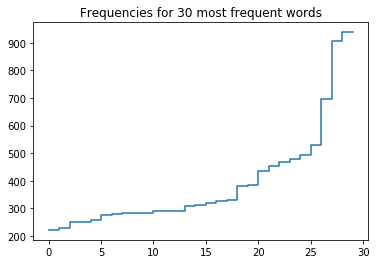

In [8]:
n_words = 30
tu.plot_word_histogram(sorted_wf, n_words,"Frequencies for %s most frequent words" % n_words);

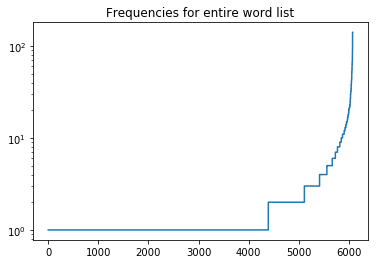

In [44]:
tu.plot_word_histogram(sorted_wf, 1.0, "Frequencies for entire word list");

In [49]:
import networkx as nx
n_nodes = 30
popular = sorted_wf[-n_nodes:]
pop_words = [wc[0] for wc in popular]
co_occur = tu.co_occurrences(lines, pop_words)
wgraph = tu.co_occurrences_graph(popular, co_occur, cutoff=1)
#wgraph = nx.connected_component_subgraphs(wgraph)[0]

centrality = nx.eigenvector_centrality_numpy(wgraph)
tu.summarize_centrality(centrality)


Graph centrality
         shares: 0.525
          sells: 0.349
          stock: 0.297
           corp: 0.27
          group: 0.239
     investment: 0.218
     management: 0.216
         bought: 0.213
        capital: 0.18
           sell: 0.175
           down: 0.171
           sold: 0.157
          price: 0.131
         market: 0.122
        company: 0.117
         target: 0.111
           buys: 0.106
         rating: 0.095
         stocks: 0.0929
          stake: 0.0922
           more: 0.0917
          after: 0.085
       earnings: 0.0844
   @ispytrading: 0.0684
          short: 0.0417
         buying: 0.0329
        bullish: 0.0304
           long: 0.0239
        s&amp;p: 0.0224
       #futures: 0.0116


Graph visualization for query: S&P 500 stocks


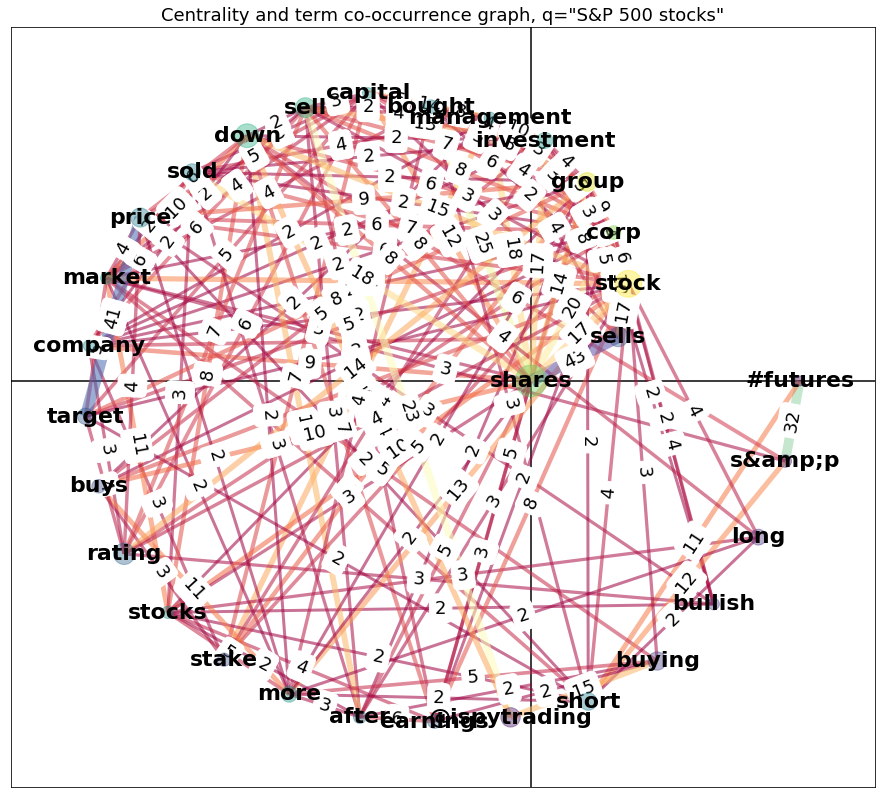

In [50]:
from matplotlib import pyplot as plt
query = 'S&P 500 stocks'
print ("Graph visualization for query:", query)
tu.plot_graph(wgraph, tu.centrality_layout(wgraph, centrality), plt.figure(figsize=(12,12)),
    title='Centrality and term co-occurrence graph, q="%s"' % query)